In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
cd Desktop

C:\Users\diego\Desktop


In [3]:
cd DATA

C:\Users\diego\Desktop\DATA


In [4]:
DBM2010 = pd.read_spss("2010.sav")
DBM2011 = pd.read_spss("2011.sav")
DBM2012 = pd.read_spss("2012.sav")
DBM2013 = pd.read_spss("2013.sav")
DBM2014 = pd.read_spss("2014.sav")
DBM2015 = pd.read_spss("2015.sav")
DBM2016 = pd.read_spss("2016.sav")
DBM2017 = pd.read_spss("2017.sav")
DBM2018 = pd.read_spss("2018.sav")
DBM2019 = pd.read_spss("2019.sav")

In [5]:
DBM2019.columns.to_list(), len(DBM2019.columns.to_list())

(['DEPREG',
  'MUPREG',
  'MESREG',
  'AÑOREG',
  'AÑOOCU',
  'CLAUNI',
  'NUNUHO',
  'NUNUMU',
  'EDADHOM',
  'EDADMUJ',
  'PUEHOM',
  'PUEMUJ',
  'NACHOM',
  'NACMUJ',
  'ESCHOM',
  'ESCMUJ',
  'CIUOHOM',
  'CIUOMUJ',
  'DEPOCU',
  'MUPOCU',
  'DIAOCU',
  'MESOCU'],
 22)

In [6]:
#ARREGLAMOS LAS COLUMNAS AÑOOCU , 
DBM2010.rename(columns={'Añoocu':'AÑOOCU'}, inplace=True)
DBM2011.rename(columns={'Añoocu':'AÑOOCU'}, inplace=True)
DBM2012[['AÑOOCU']] = 2012.0
DBM2013[['AÑOOCU']] = 2013.0
DBM2014[['AÑOOCU']] = 2014.0

In [7]:
#ARREGLAMOS LAS COLUMNAS GETMUJ Y PUEMUJ

DBM2013[['GETMUJ']] = 'No indigena'
DBM2013.loc[DBM2013['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2013.loc[DBM2013['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2014[['GETMUJ']] = 'No indigena'
DBM2014.loc[DBM2014['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2014.loc[DBM2014['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2015[['GETMUJ']] = 'No indigena'
DBM2015.loc[DBM2015['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2015.loc[DBM2015['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2016[['GETMUJ']] = 'No indigena'
DBM2016.loc[DBM2016['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2016.loc[DBM2016['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2017[['GETMUJ']] = 'No indigena'
DBM2017.loc[DBM2017['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2017.loc[DBM2017['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2018[['GETMUJ']] = 'No indigena'
DBM2018.loc[DBM2018['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2018.loc[DBM2018['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2019[['GETMUJ']] = 'No indigena'
DBM2019.loc[DBM2019['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2019.loc[DBM2019['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


In [8]:
#ARREGLAMOOS LAS COLUMNAS GETHOM AND PUEHOM

DBM2013[['GETHOM']] = 'No indigena'
DBM2013.loc[DBM2013['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2013.loc[DBM2013['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2014[['GETHOM']] = 'No indigena'
DBM2014.loc[DBM2014['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2014.loc[DBM2014['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2015[['GETHOM']] = 'No indigena'
DBM2015.loc[DBM2015['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2015.loc[DBM2015['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2016[['GETHOM']] = 'No indigena'
DBM2016.loc[DBM2016['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2016.loc[DBM2016['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2017[['GETHOM']] = 'No indigena'
DBM2017.loc[DBM2017['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2017.loc[DBM2017['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2018[['GETHOM']] = 'No indigena'
DBM2018.loc[DBM2018['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2018.loc[DBM2018['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2019[['GETHOM']] = 'No indigena'
DBM2019.loc[DBM2019['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2019.loc[DBM2019['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


In [9]:
#Arreglamos las columnas 2010,2011,2012 , todaAS LAS COLUMNAS EN MAYUSCULAS y EL MISMO NOMBRE DE COLUMNAS.
DBM2010.rename(columns={'Depreg': 'DEPREG', 'mupreg': 'MUPREG', 'Mesreg':'MESREG', 'Añoreg':'AÑOREG', 'Clauni':'CLAUNI', 'Edadhom': 'EDADHOM', 'Edadmuj': 'EDADMUJ', 'Nachom':'NACHOM', 'Nacmuj':'NACMUJ', 'Eschom':'ESCHOM', 'Escmuj': 'ESCMUJ', 'Ocuhom':'CIUOHOM', 'Ocumuj':'CIUOMUJ', 'Depocu': 'DEPOCU', 'mupocu':'MUPOCU', 'Diaocu':'DIAOCU', 'Mesocu':'MESOCU', 'Gethom':'GETHOM', 'Getmuj':'GETMUJ'}, inplace=True)
DBM2011.rename(columns={'Depreg': 'DEPREG', 'mupreg': 'MUPREG', 'Mesreg':'MESREG', 'Añoreg':'AÑOREG', 'Clauni':'CLAUNI', 'Edadhom': 'EDADHOM', 'Edadmuj': 'EDADMUJ', 'Nachom':'NACHOM', 'Nacmuj':'NACMUJ', 'Eschom':'ESCHOM', 'Escmuj': 'ESCMUJ', 'Ocuhom':'CIUOHOM', 'Ocumuj':'CIUOMUJ', 'Depocu': 'DEPOCU', 'mupocu':'MUPOCU', 'Diaocu':'DIAOCU', 'Mesocu':'MESOCU', 'Gethom':'GETHOM', 'Getmuj':'GETMUJ'}, inplace=True)
DBM2012.rename(columns={'OCUHOM':'CIUOHOM', 'OCUMUJ': 'CIUOMUJ'}, inplace=True)


In [10]:
COL_CONSENSUS = ['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'CLAUNI', 'EDADHOM', 'EDADMUJ', 'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ', 'DEPOCU', 'MUPOCU', 'DIAOCU', 'MESOCU', 'AÑOOCU', 'GETHOM', 'GETMUJ']

frames_list = [DBM2010[COL_CONSENSUS], DBM2011[COL_CONSENSUS], DBM2012[COL_CONSENSUS], DBM2013[COL_CONSENSUS], DBM2014[COL_CONSENSUS], DBM2015[COL_CONSENSUS], DBM2016[COL_CONSENSUS], DBM2017[COL_CONSENSUS], DBM2018[COL_CONSENSUS], DBM2019[COL_CONSENSUS]]

DATAMATRIMONIOS = pd.concat(frames_list)



In [11]:
#ELIMINAMOS LOS DATOS IRRELEVANTES A LA EDAD Y EL ANALISIS DE LOS DATOS.
DATAMATRIMONIOS = DATAMATRIMONIOS[DATAMATRIMONIOS['EDADHOM'] != 'Ignorado']
DATAMATRIMONIOS = DATAMATRIMONIOS[DATAMATRIMONIOS['EDADMUJ'] != 'Ignorado']

DATAMATRIMONIOS['AÑOREG'] = DATAMATRIMONIOS['AÑOREG'].astype(int)
DATAMATRIMONIOS['EDADHOM'] = DATAMATRIMONIOS['EDADHOM'].astype(int)
DATAMATRIMONIOS['EDADMUJ'] = DATAMATRIMONIOS['EDADMUJ'].astype(int)
DATAMATRIMONIOS['DIAOCU'] = DATAMATRIMONIOS['DIAOCU'].astype(int)
DATAMATRIMONIOS['AÑOOCU'] = DATAMATRIMONIOS['AÑOOCU'].astype(int)


2012    84113
2013    80676
2014    79436
2015    79136
2011    78101
2019    76926
2018    74777
2010    72748
2017    71592
2016    69598
Name: AÑOOCU, dtype: int64


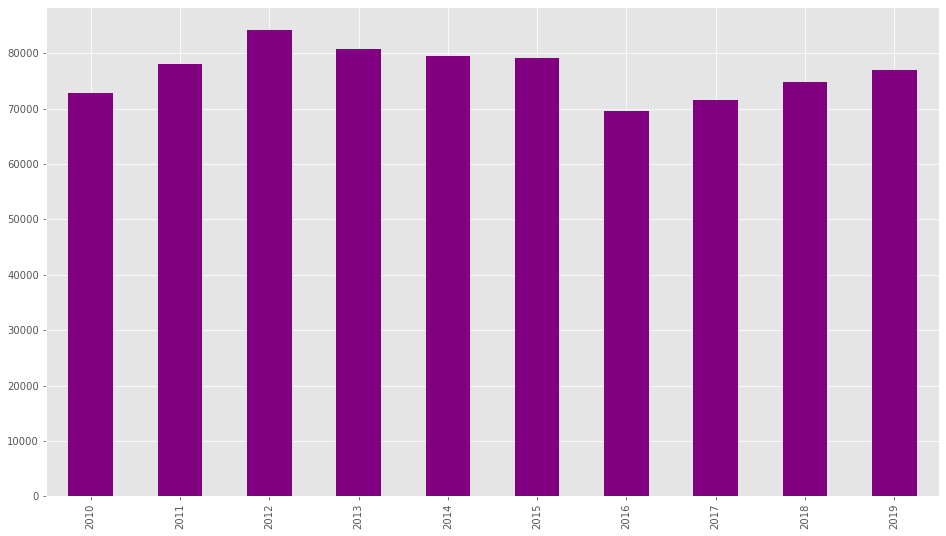

In [12]:
#GRAFICA DE BARRAS DE MATRIMONIOS POR AñO

DATAMATRIMONIOS['AÑOOCU'].value_counts().sort_index().plot(kind='bar',color='purple')

print(DATAMATRIMONIOS['AÑOOCU'].value_counts().sort_values(ascending=False))

In [13]:
# Modificacion de valores en , se cambio MESOCU ,ESCMUJ,  y MESREG a enteros.

DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].astype(str)
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Enero', '1')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Febrero', '2')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Marzo', '3')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Abril', '4')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Mayo', '5')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Junio', '6')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Julio', '7')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Agosto', '8')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Septiembre', '9')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Octubre', '10')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Noviembre', '11')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Diciembre', '12')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].astype(int)

DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].astype(str)
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Enero', '1')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Febrero', '2')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Marzo', '3')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Abril', '4')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Mayo', '5')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Junio', '6')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Julio', '7')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Agosto', '8')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Septiembre', '9')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Octubre', '10')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Noviembre', '11')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Diciembre', '12')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].astype(int)


DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJ'].astype(str)
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Ignorado', '-1')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Ninguno', '0')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Primaria', '1')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Básico', '2')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Diversificado', '3')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('DIversificado', '3')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Universitario', '4')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Postgrado', '5')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Post Grado', '5')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].astype(int)

DATAMATRIMONIOS = DATAMATRIMONIOS[DATAMATRIMONIOS['ESCMUJINT'] >= 0]

DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOM'].astype(str)
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Ignorado', '-1')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Ninguno', '0')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Primaria', '1')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Básico', '2')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Diversificado', '3')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('DIversificado', '3')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Universitario', '4')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Postgrado', '5')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Post Grado', '5')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].astype(int)


DATAMATRIMONIOS = DATAMATRIMONIOS[DATAMATRIMONIOS['ESCHOMINT'] >= 0]


Podemos observar que no hay una diferencia significativa entre los matrimonios en cada año.

Guatemala         140501
Huehuetenango      51590
Alta Verapaz       48188
San Marcos         45542
Quiche             42311
Quetzaltenango     40258
Chimaltenango      34701
Escuintla          31040
Suchitepequez      30432
Jutiapa            22829
Peten              22216
Totonicapan        22162
Solola             18712
Sacatepequez       17360
Retalhuleu         17125
Santa Rosa         16297
Chiquimula         15838
Jalapa             14165
Izabal             14069
Baja Verapaz       13305
Zacapa             10726
El Progreso         7549
Name: DEPREG, dtype: int64


<AxesSubplot:ylabel='DEPREG'>

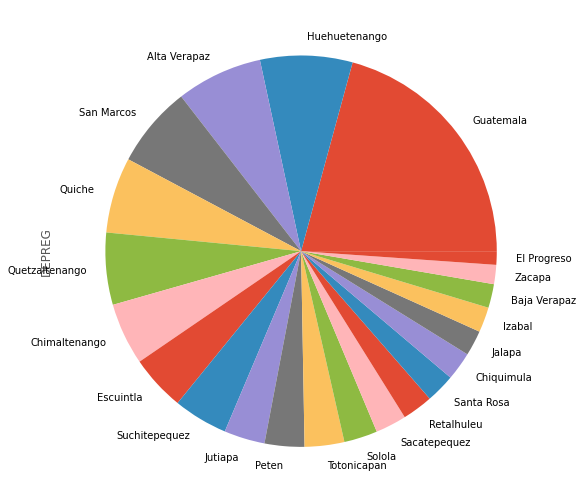

In [14]:
# MATRIMONIOS POR DEPARTAMENTO DE GUATEMALA

print(DATAMATRIMONIOS['DEPREG'].value_counts().sort_values(ascending=False))
DATAMATRIMONIOS['DEPREG'].value_counts().plot(kind='pie')

Es muy evidente la diferencia entre los matrimonions en los departamentos, especialmente en Guatemala, esto se debe a que es el departamento mas poblado , siendo la capital del pais.

Guatemala                74496
Villa Nueva              12074
Quetzaltenango            9592
Cobán                     9145
San Pedro Carchá          8655
                         ...  
Santa Catarina Palopó      118
Petatán                     89
Sipacate                    86
San Marcos la Laguna        76
San José La Maquina         73
Name: MUPREG, Length: 335, dtype: int64


<AxesSubplot:>

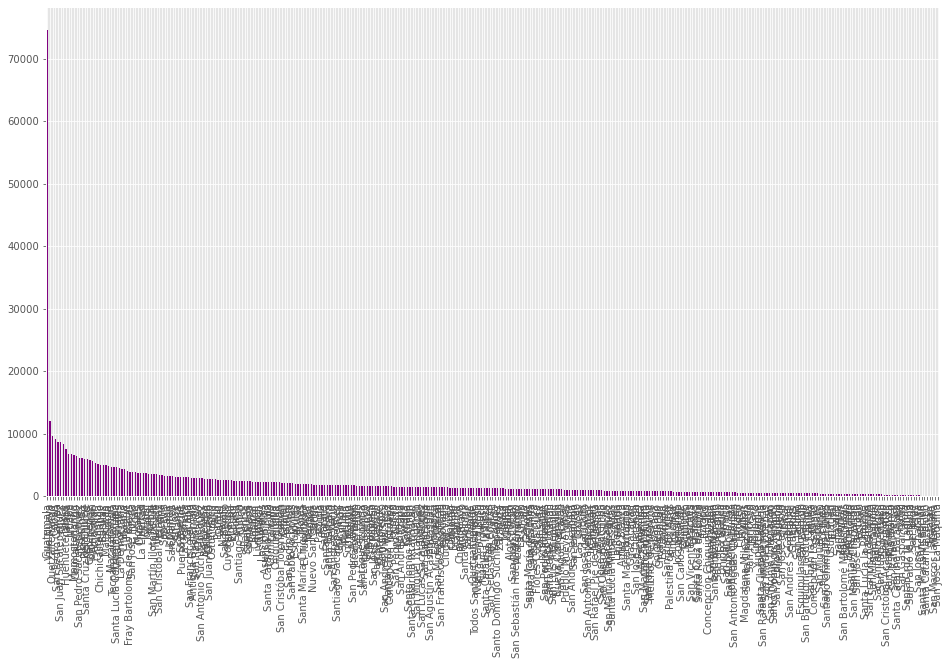

In [15]:
# MATRIMONIOS POR REGION DE GUATEMALA
print(DATAMATRIMONIOS['MUPREG'].value_counts().sort_values(ascending=False))
DATAMATRIMONIOS['MUPREG'].value_counts().plot(kind='bar',color='purple')

Debido a que las regiones son demasiadas en cantidad no se puede realizar un analisis optimo. Sin embargo podemos ver claramente que la region dominante en matrimonios es la capital nuevamente, la region mas pooblada.

<AxesSubplot:>

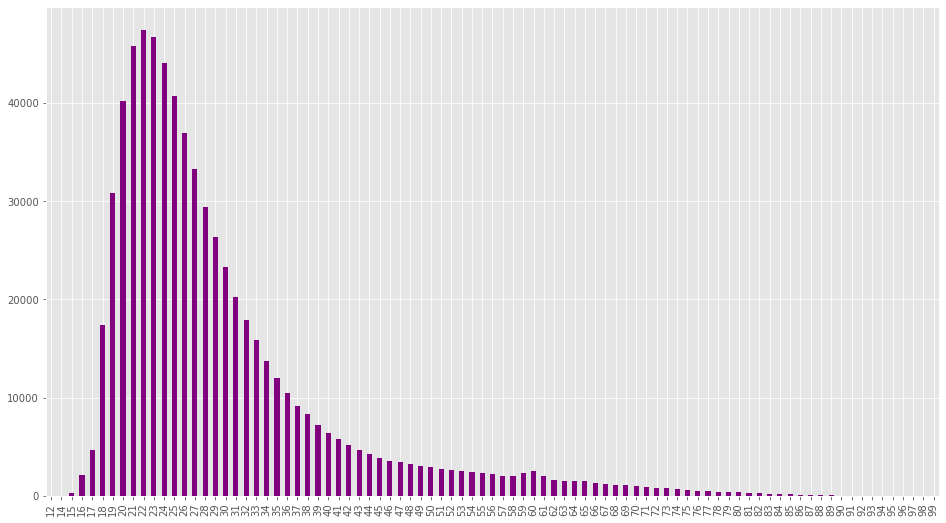

In [15]:
# MATRIMONIOS POR EDAD DEL HOMBRE DE GUATEMALA
DATAMATRIMONIOS['EDADHOM'].value_counts().sort_index().plot(kind='bar',color='purple')


Podemos observar que la edad mas comun para contraer Matrimonio es a los 20-25 años , sin embargo, existen matrimonios de menores de edad, principamente a la edad de 17 años, siendo el hombre todavia NO mayor de edad, tambien ematrimonios a los 15-16 años.

<AxesSubplot:>

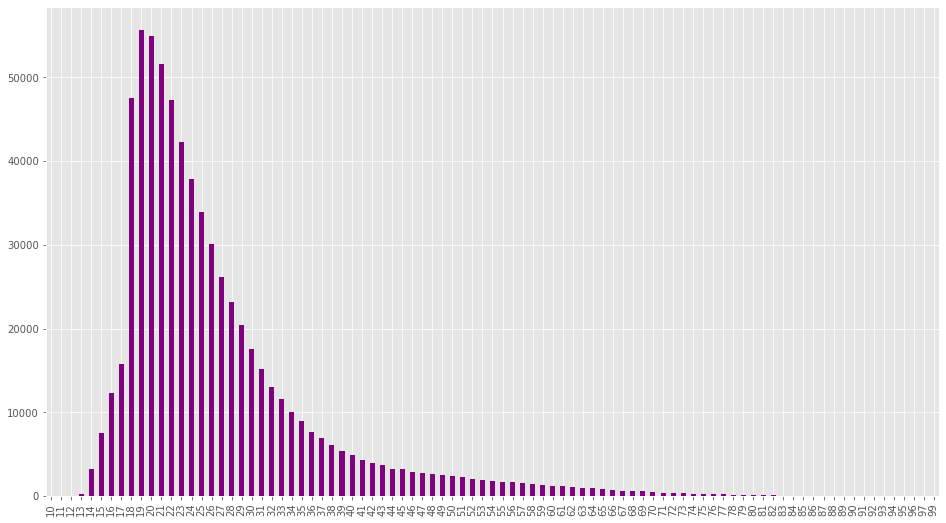

In [16]:
# MATRIMONIOS POR EDAD DE MUJER DE GUATEMALA
DATAMATRIMONIOS['EDADMUJ'].value_counts().sort_index().plot(kind='bar',color='purple')


Podemos observar que las mujeres tienen un alto indice al momento de contraer matrimonio siendo menores, mucho mas que los hombres, la edad donde mas contraen es a los 19 , sin embargo, a la edad de 17 , 16 , 15 y 14 contraen matrimonios significativamente.

12    69271
1     64124
5     60189
3     59918
11    58504
4     55160
2     54802
8     54484
10    52525
6     50110
7     49298
9     48531
Name: MESREG, dtype: int64


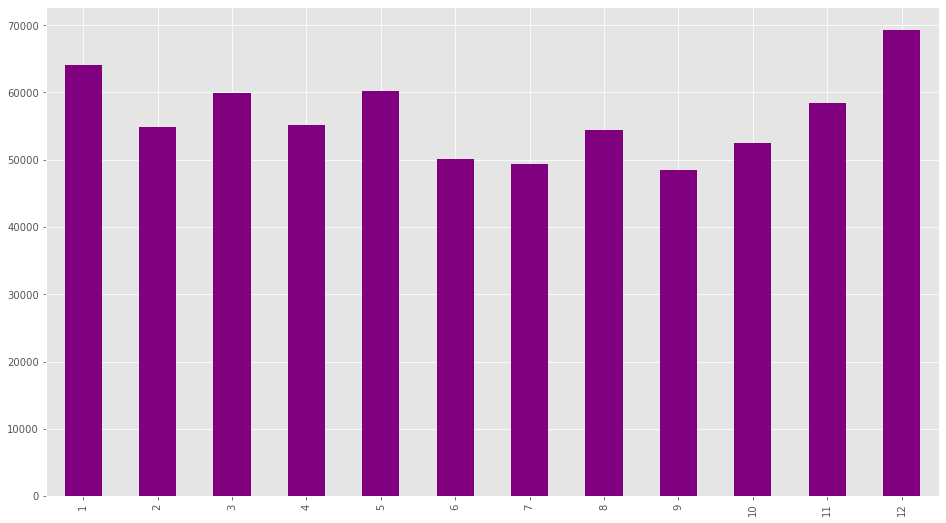

In [17]:
DATAMATRIMONIOS['MESREG'].value_counts().sort_index().plot(kind='bar',color='purple')

print(DATAMATRIMONIOS['MESREG'].value_counts().sort_values(ascending=False))

Podemos ver que el mes donde mas se contraen matirmonios es Diciembre , siguiendole Enero.

<AxesSubplot:>

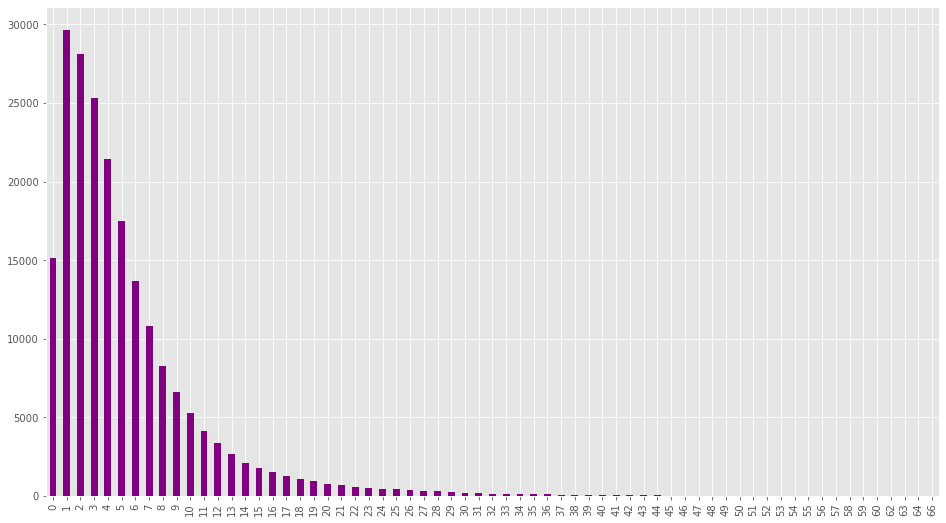

In [18]:
#CREAMOS RESTAEDADES PARA OBTENER LA DIFERENCIA DE EDADES ENTRE LAS PERSONAS CONTRAYENDO MATRIMONIO
DATAMATRIMONIOS['RESTAEDADES'] = DATAMATRIMONIOS['EDADHOM'].sub(DATAMATRIMONIOS['EDADMUJ']).abs()

DATAMATRIMONIOS[(DATAMATRIMONIOS['ESCMUJINT'] == 0) | (DATAMATRIMONIOS['ESCHOMINT'] == 0)]['RESTAEDADES'].value_counts().sort_index().plot(kind='bar',color='purple')

En este grafico podemos observar la diferencia de edades entre los casados, la mayoria de matrimonios tienen de diferencia entre 1-5 años.

Asimetria: 2.736381059440005
Curtosis: 12.256656644698323


<AxesSubplot:>

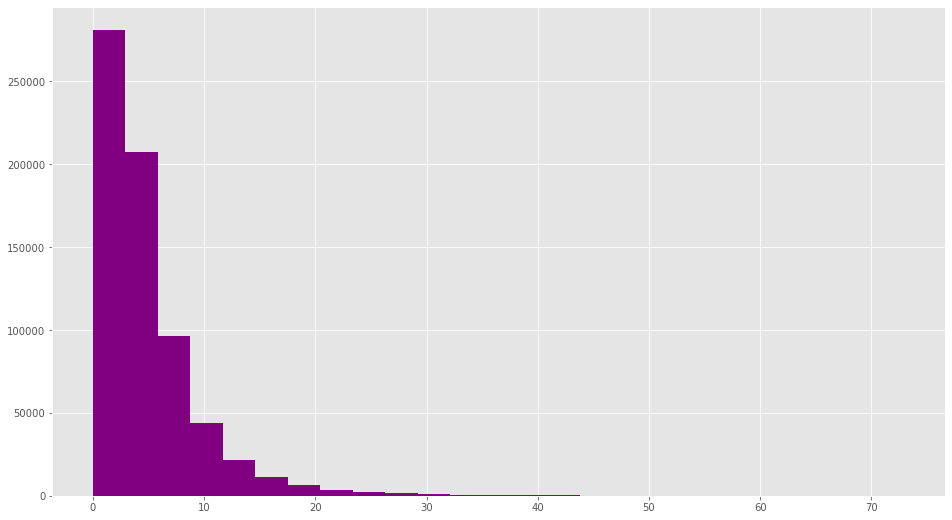

In [19]:
print('Asimetria:', DATAMATRIMONIOS['RESTAEDADES'].skew())
print('Curtosis:', DATAMATRIMONIOS['RESTAEDADES'].kurt())
DATAMATRIMONIOS['RESTAEDADES'].hist(bins=25,color='purple')

Aqui podemos observar en el histograma de diferencias de edades entre los casados que la curtosis es de 12.25, coeficiente positivo mayor a 3 , notamos que los valores estan bastante concentrados. La asimetria de igual forma tiene un coeficiente positivo, podemos ver que la media de los datos esta hacia la derecha por eso mayor a 0 el valor de asimetria.

<AxesSubplot:>

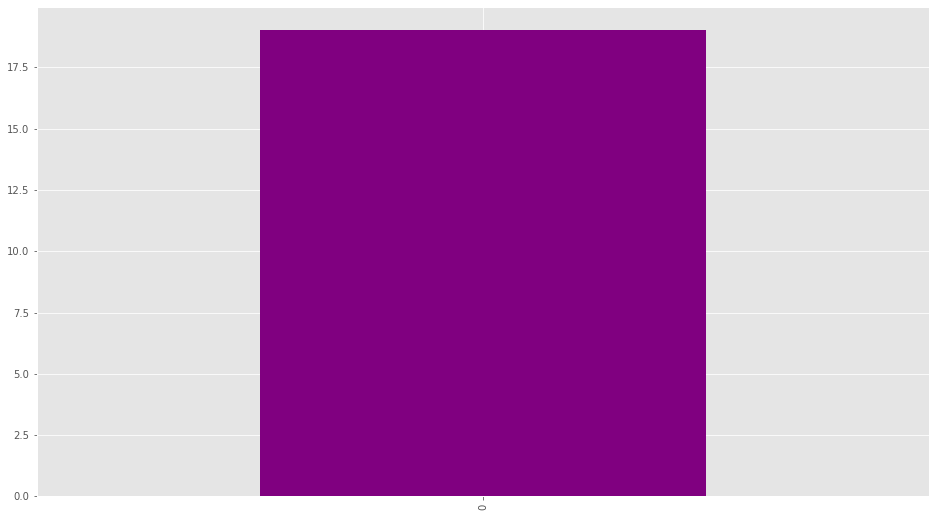

In [20]:
DATAMATRIMONIOS['EDADMUJ'].mode('EDADMUJ').plot(kind='bar',color='purple')

In [21]:
#INICIA EL CLUSTERING

Lets = DATAMATRIMONIOS[[ 'MESOCU', 'EDADHOM', 'EDADMUJ', 'ESCHOMINT', 'ESCMUJINT']] #Declaramos nuestra lista de columnas a trabajar

CantDatos = np.array(Lets.sample(frac=0.1, random_state=123).reset_index(drop=True)) #Declaramos CantDatos
CantDatos_scaled = sklearn.preprocessing.scale(CantDatos) #Realizamos las modificaicones a CantDatos
pyclustertend.hopkins(CantDatos, len(CantDatos)) #Aplicamos HOPKINS para ver  la tendencia para los clusters

0.0768116261000758

El valor de hopkins nos da un 0.0768 alejado de 0.5 validando nuestro clustering.

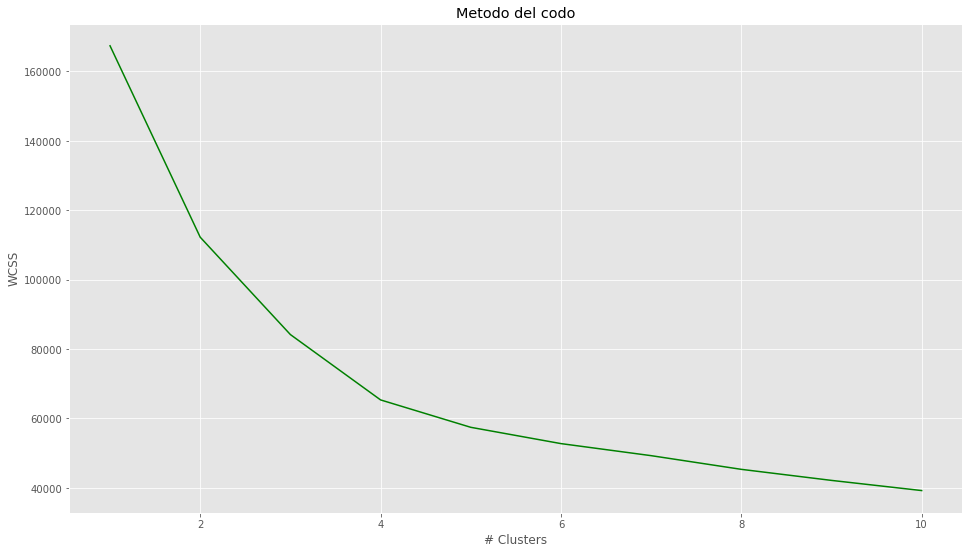

In [23]:
Lets_norm = (Lets - Lets.min()) / (Lets.max() - Lets.min())  #Realizamos una normalizacaion entre las variables a trabajar.
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter=300)         #Utilizamos el metodo del codo y el algoritmo KMEANS
    kmeans.fit(Lets_norm)                                 #para determinar la mejor cantidad de clusters dependiendo los datos normalizados.
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,color='green')
plt.title('Metodo del codo')
plt.xlabel('# Clusters')
plt.ylabel('WCSS')
plt.show()


Utilizamos KMEANS , y podemos observar como el declieve en la pendiente se da en el valor de 2 , siendo este la mejor cantidad de clusters a utilizar gracias al metodo de Codo.

In [ ]:
# METODO DE SILUETA REALIZADO USANDO DE BASE EL EJERCICO DE SILUETA REALIZADO EN LA CLASE

range_n_clusters = [2, 3, 4, 5, 6]

# Inicia ciclo respecto a los valores que puede tomar nuestro conjunto de clusteres
for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(CantDatos) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(CantDatos)

    silhouette_avg = silhouette_score(CantDatos, cluster_labels)
    print(
        "Con: ",
        n_clusters,
        "Clusters  La cantidad promedio de la silueta es :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(CantDatos, cluster_labels)

    y_lower = 10

    # Inicia el ciclo sobre los grupos de clusters
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)

        # Imprimimos la silueta
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Dibujamos los nombres del determinado grupo
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10

    ax1.set_title("Silueta para n = {} Clusters".format(n_clusters))
    ax1.set_xlabel("Silueta Coeficiente")
    ax1.set_ylabel("# Cluster")


    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) 

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        CantDatos[:, 0], CantDatos[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Dibuja el centroide de cada grupo
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):

        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")



    ax2.set_title("Distribución de datos")
    ax2.set_xlabel("X1")
    ax2.set_ylabel("X2")

    plt.suptitle(
        "Silueta K-Means con = %d Clusters"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Con:  2 Clusters  La cantidad promedio de la silueta es : 0.6470934954694808
Con:  3 Clusters  La cantidad promedio de la silueta es : 0.45092961450524927
Con:  4 Clusters  La cantidad promedio de la silueta es : 0.3554927285661972
Con:  5 Clusters  La cantidad promedio de la silueta es : 0.2930803134322536
Con:  6 Clusters  La cantidad promedio de la silueta es : 0.2600252843572982


Podemos observar los coeficientes de silueta de nuestros distintos escenarios con distinta cantidad de clusters, notamos que en 2 clusteres tenemos un coeficiente de 0.64, siendo este un buen resultado del promedio. Dado este resultado mas el metodo de codo podemos reafirmar que utilizar 2 clusteres es lo mas optimo .

INICIA PRUEBA DE HERARQUIQAL CLUSTERING PARA AGRUPAMIENTO

In [22]:
# CREACION DE UNA MUESTRA RANDOM PEQUEñA  
DATA2 = DATAMATRIMONIOS[[ 'MESOCU', 'EDADHOM', 'EDADMUJ', 'ESCHOMINT', 'ESCMUJINT']].apply(pd.to_numeric)
DATA2 = DATA2.sample(frac=0.01).reset_index(drop=True)
CANTDATA2 = np.array(DATA2)
DATA2

,MESOCU,EDADHOM,EDADMUJ,ESCHOMINT,ESCMUJINT
0,6,29,24,0,1
1,2,22,25,3,1
2,3,27,28,3,1
3,10,44,38,2,1
4,6,60,41,2,2
...,...,...,...,...,...
6764,10,19,19,1,1
6765,7,21,17,1,0
6766,6,20,21,2,2
6767,10,19,19,1,1


In [23]:
Lets = DATAMATRIMONIOS[['DIAOCU', 'MESOCU', 'EDADHOM', 'EDADMUJ', 'MESREG']]
Lets = Lets.sample(frac=0.01, random_state=123).reset_index(drop=True)
Lets_norm = (Lets - Lets.min()) / (Lets.max() - Lets.min())
Lets_norm

,DIAOCU,MESOCU,EDADHOM,EDADMUJ,MESREG
0,0.433333,1.000000,0.064103,0.076923,1.000000
1,0.166667,1.000000,0.153846,0.064103,1.000000
2,0.966667,0.181818,0.217949,0.205128,0.272727
3,0.433333,0.181818,0.423077,0.423077,0.181818
4,0.966667,0.909091,0.128205,0.282051,1.000000
...,...,...,...,...,...
6764,0.433333,0.818182,0.089744,0.089744,0.818182
6765,0.666667,0.636364,0.410256,0.141026,0.636364
6766,0.433333,0.636364,0.141026,0.102564,0.636364
6767,0.166667,0.090909,0.076923,0.115385,0.272727


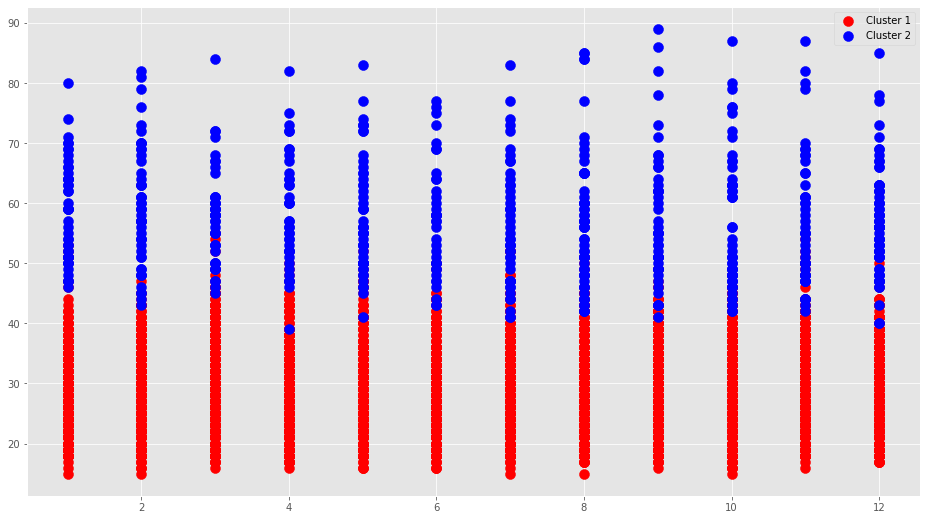

In [25]:
#PROBAMOS CLUSTERING HERARQUICO
nm = cluster.AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
nmjerc = nm.fit_predict(DATA2)

plt.scatter(DATA2.iloc[nmjerc == 0, 0], DATA2.iloc[nmjerc == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(DATA2.iloc[nmjerc == 1, 0], DATA2.iloc[nmjerc == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.legend()

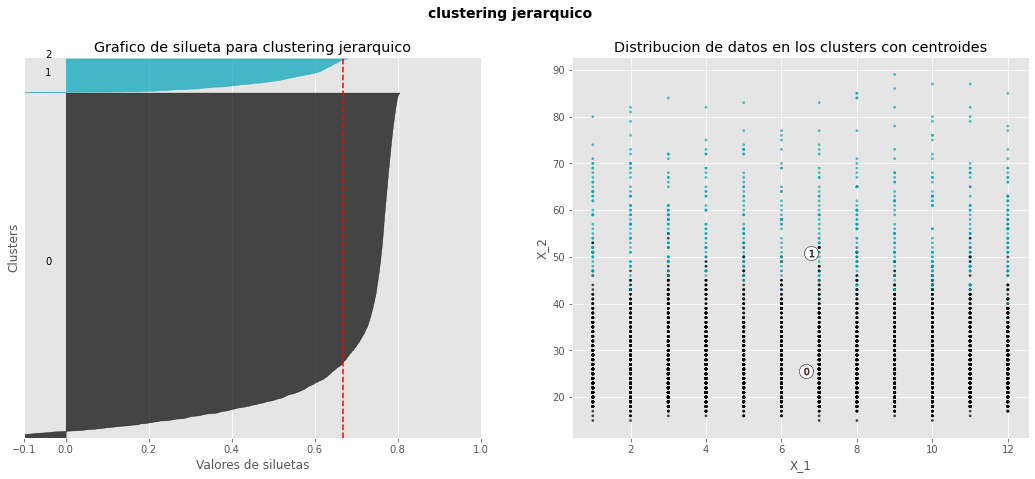

In [26]:
DATA = DATA2

clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(DATA)
# Basado en el ejemplo visto en clase


cluster_labels = nmjerc


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(DATA) + (3 + 1) * 10])
sample_silhouette_values = silhouette_samples(DATA, cluster_labels)
y_lower = 10

for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  

ax1.set_title("Grafico de silueta para clustering jerarquico")
ax1.set_xlabel("Valores de siluetas")
ax1.set_ylabel("Clusters")
ax1.axvline(x=silhouette_score(DATA, nmjerc), color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors = cm.nipy_spectral(cluster_labels.astype(float) / 3)
ax2.scatter(DATA.iloc[:, 0], DATA.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

centers = clusterer.cluster_centers_
ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("Distribucion de datos en los clusters con centroides")
ax2.set_xlabel("X_1")
ax2.set_ylabel("X_2")

plt.suptitle(
        "clustering jerarquico",
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [27]:
print("Evaluamos meteodo de silueta sobre nuestro clustering jerarquico:", silhouette_score(DATA, nmjerc))


Evaluamos meteodo de silueta sobre nuestro clustering jerarquico: 0.6690188067676729


Analizamos el agrupamiento mediante clustering jerarquico es una buena opción, tenemos un buen valor de silueta , dicho agrupamiento tiene tendencia a ser uno optimo.

In [28]:

Lets['RESTAEDADES'] = Lets['EDADHOM'].sub(Lets['EDADMUJ']).abs()

hierarchical_cluster = pd.Series(nmjerc)
Lets['hierarchical'] = hierarchical_cluster

Lets.dropna()

,DIAOCU,MESOCU,EDADHOM,EDADMUJ,MESREG,RESTAEDADES,hierarchical
0,14,12,20,19,12,1,0
1,6,12,27,18,12,9,0
2,30,3,32,29,4,3,0
3,14,3,48,46,3,2,0
4,30,11,25,35,12,10,1
...,...,...,...,...,...,...,...
6764,14,10,22,20,10,2,0
6765,21,8,47,24,8,23,0
6766,14,8,26,21,8,5,0
6767,6,2,21,22,4,1,0


In [29]:
Lets.groupby(['hierarchical','EDADHOM', 'EDADMUJ']).size()

hierarchical  EDADHOM  EDADMUJ
0             15       14         1
              16       14         2
                       15         2
                       16         7
                       17         4
                                 ..
1             77       68         1
              78       67         1
              79       41         1
              82       75         1
                       76         1
Length: 1466, dtype: int64

In [30]:
Lets.groupby(['hierarchical'])['RESTAEDADES'].mean()

hierarchical
0    4.557231
1    4.289517
Name: RESTAEDADES, dtype: float64

In [31]:
Lets.groupby(['hierarchical'])['EDADHOM', 'EDADMUJ'].mean()

C:\Users\diego\AppData\Local\Temp/ipykernel_17248/732910292.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Lets.groupby(['hierarchical'])['EDADHOM', 'EDADMUJ'].mean()


,EDADHOM,EDADMUJ
hierarchical,,
0,29.82928,26.910182
1,29.78203,27.000000


In [32]:
Lets.groupby(['hierarchical'])['hierarchical'].count()

hierarchical
0    6168
1     601
Name: hierarchical, dtype: int64

Al realizar el conteo podemos notar una gran diferencia entre la cantidad en los clusteres, esto puede ser indice que el cluster 1 sea un cluster con datos atipicos.

# CLUSTER 0

(array([[ 877., 2873., 1280.,  493.,  231.,  186.,  116.,   73.,   26.,
           13.],
        [1788., 2571.,  977.,  387.,  198.,  127.,   76.,   28.,   12.,
            4.]]),
 array([13., 21., 29., 37., 45., 53., 61., 69., 77., 85., 93.]),
 <a list of 2 BarContainer objects>)

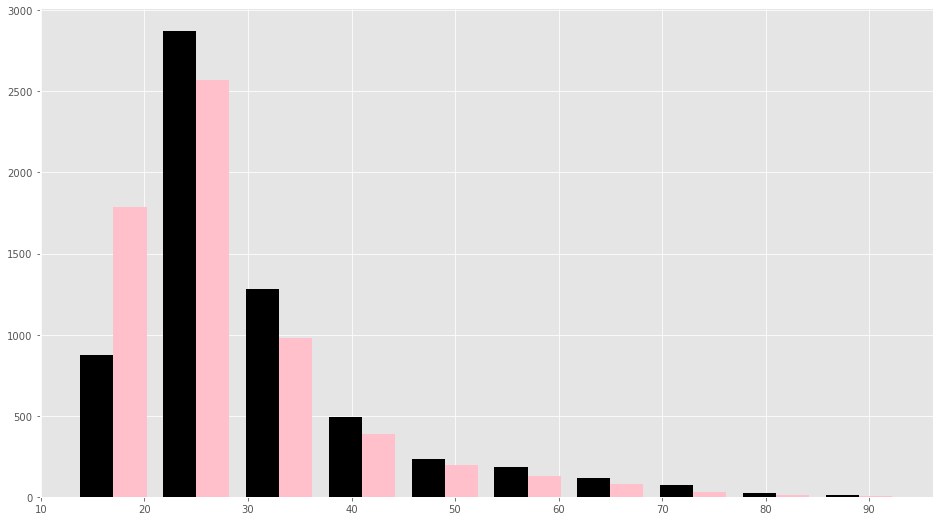

In [33]:
cluster_0 = Lets[Lets['hierarchical'] == 0]
plt.hist(cluster_0[['EDADHOM', 'EDADMUJ']],color=['black','pink'])

POdemos vere como los hombres (color negro) tienden a ser mayores al momento de contraer matrimonio si son mayores de 20 años, sin embargo, las mujeres (color rosado) tienden a ser mayores si es en casos de menos de 20 años.

(array([4.440e+03, 1.164e+03, 3.690e+02, 1.010e+02, 6.300e+01, 2.400e+01,
        5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <BarContainer object of 10 artists>)

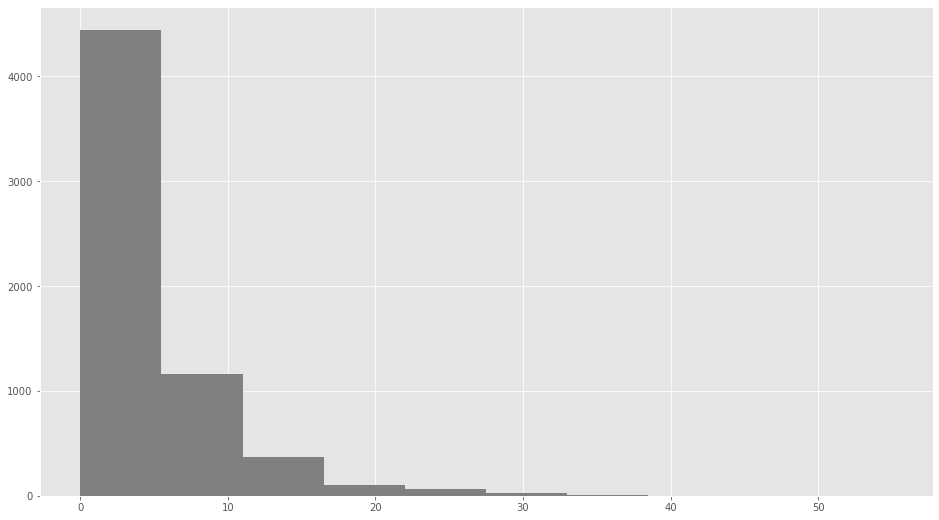

In [34]:
cluster_0 = Lets[Lets['hierarchical'] == 0]
plt.hist(cluster_0[['RESTAEDADES']],color='gray')

Aqui podemos ver como la mayoria de matrimonios son en parejas que tienen una diferencia de edad menor a 5 años, existen casos donde la diferencia de edad llega hasta los 35+ años.

<AxesSubplot:>

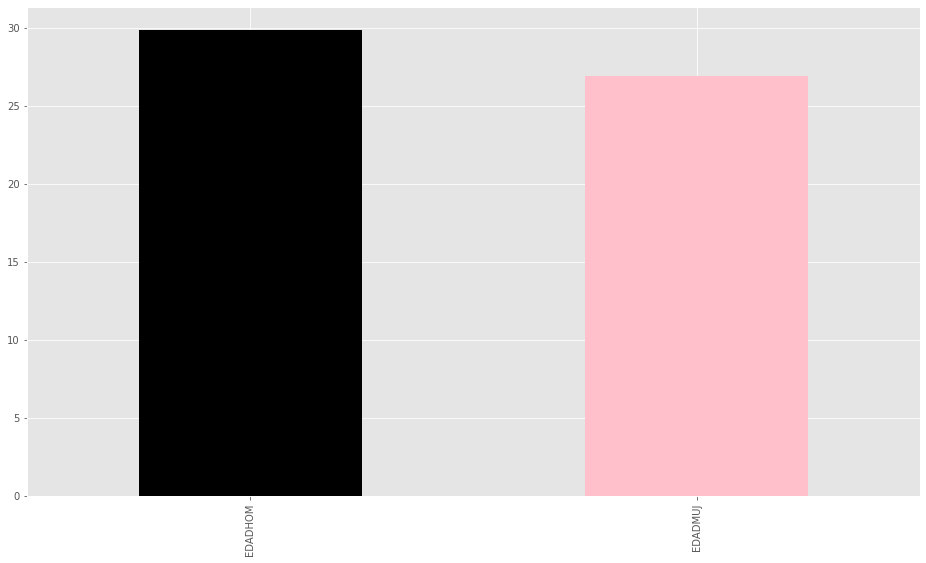

In [35]:
cluster_0[['EDADHOM', 'EDADMUJ']].mean().plot(kind='bar',color=["black","pink"])


Podemos ver como el promedio de edad al contraer matrimonio es similar entre los generos, sin embargo, el hombre si es mayor en la mayoria de matrimonios

# CLUSTER 1

(array([[135., 246., 102.,  43.,  17.,  22.,  13.,  16.,   3.,   4.],
        [224., 204.,  89.,  30.,  17.,  13.,   9.,  11.,   3.,   1.]]),
 array([14. , 21.1, 28.2, 35.3, 42.4, 49.5, 56.6, 63.7, 70.8, 77.9, 85. ]),
 <a list of 2 BarContainer objects>)

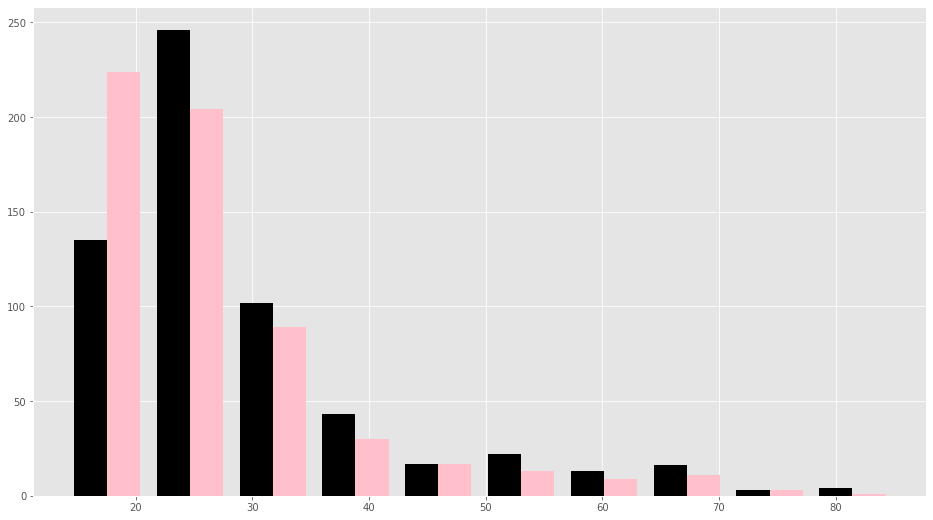

In [36]:
cluster_1 = Lets[Lets['hierarchical'] == 1]
plt.hist(cluster_1[['EDADHOM', 'EDADMUJ']],color=['black','pink'])

Podemos ver que para el cluster 1 de igual manera predominan las mismas condiciones que en el cluster 0, los hombres tienden a ser mayores cuando son mayores a 20 y las mujeres cuando son menores, cabe adicionar que la mayoria de matrimonios se contraen a los 20.

<AxesSubplot:>

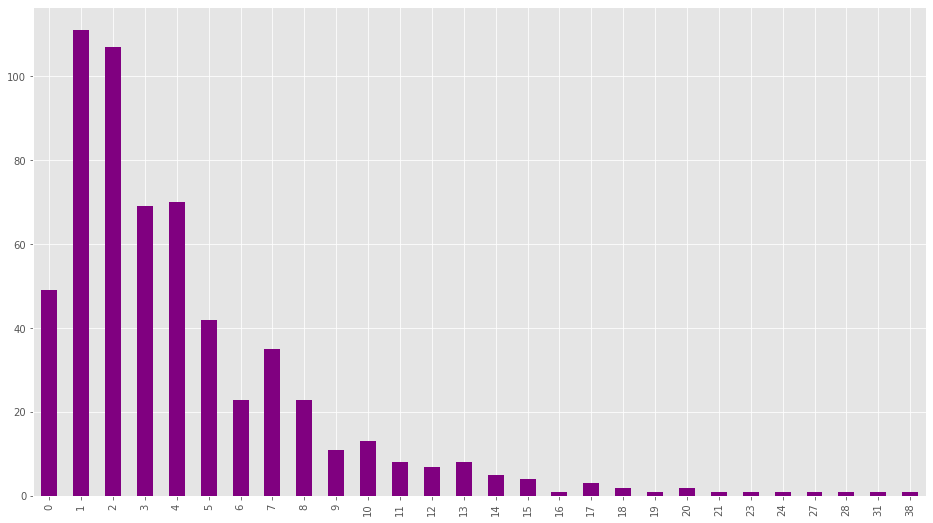

In [37]:
cluster_1['RESTAEDADES'].value_counts().sort_index().plot(kind='bar',color="purple")


Para el cluster 1 de igual forma podemos notar que la diferencia de edad predomina en 1 años ,sigueindole 2 y 3 años. Tambien podemos ver varios datos bastante alejados de la moda .

<AxesSubplot:>

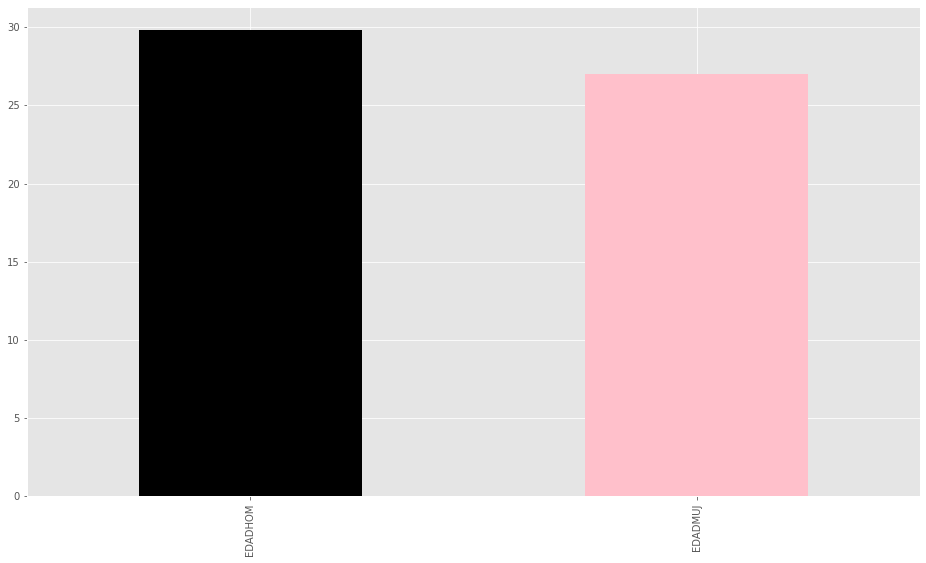

In [38]:
cluster_1[['EDADHOM', 'EDADMUJ']].mean().plot(kind='bar',color=["black","pink"])


De igual manera que con el cluster 0 podemos ver como el promedio de edad al contraer matrimonio es similar entre los generos, sin embargo, el hombre si es mayor en la mayoria de matrimonios

# INTERPRETACION DE CLUSTERS


Podemos ver como nuestro cluster 1 posee una cantidad de datos muy menor bastante significatiava a diferencia del cluster 0, esto nos dice que ese cluster es tendencia a datos no tipicos, si observamos los graficos podemos ver como en nuestra muestra de datos del cluster 1 existen mas matrimonios con una diferencia de edad bastante grande . Podemos asumir que el cluster 0 es mas acertado al momento de decir un matrimonio bueno por asi decirlo, mientras que , el cluster 1 es de matrimonios con tendencia a no ir bien. Si se deseara explorar mas seria idea realizar esto con los hombres y mujeres casados entre los 20 años que es la edad promedio mayor al momento de contrare matrimonio.

CLUSTER_0 = 'Matrimonios con tendencia correcta'
CLUSTER_1 = 'Matrimonios con tendencia incorrecta'

# ALGORITMO #1 KMEANS
Este algoritmo consiste en agrupamiento , tiene como fin en mente partir un conjunto de n observaciones en k grupos , en donde, cada observacion n estara incluido en el grupo donde su mean" su valor medio es mas cercano.

# ALGORITMO NAIVE BAYE
Este es un clasificador que tiene como base el teorema de Bayes, de ahi nace el nombre. El algoritmo consiste en " aprende de los datos de entrenamiento y luego predice la clase de la instancia de prueba con la mayor probabilidad posterior." (Scielo , 2018)
Este puede proporcionar mayor precision en algunos casos.

# ALGORTIMO ARBOLES DE DESICION
Este algoritmo consiste en clasificar los datos en desiciones los cuales compiten donde se va ramificando dependiendo de la influencia despues de tomar una desicion. El tronco del arbol es el representante de la decision inicial y comienza con los distintos escenarios.

# ALGORITMO SVM
Este algoritmo reciben datos de entrada y realizan una prediccion de las posibles categorias donde incluyen los datos de entrada. 

# ALGORITMO EM
Este algoirtmo consiste en crear parametros analizando los datos, tambien realiza una prediccion de una salida futura o algun random event dentro de los parametros definidos en los datos.




https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0718-07642018000600153#:~:text=El%20clasificador%20Na%C3%AFve%2DBayes%20aprende,et%20al.%2C%202007).

Estos algoritmos brindan un analisis bastante preciso dependiendo de que es lo que buscamos analisar , son modelos que se utilizan como herramientas podriana ayudarnos a comparar los datos, berificar mediante varios modelos cual es el mas optimo para nuestro escenario, y sobre todo nos ayuda brindando la información necesaria para concluir respecto a nuestro analisis exploratorio.

Usaria los algoritmos en mis datos para organizar los datos, se utilizo KMEANS con su verificador de metodo de silueta para comprobar que la cantidad de clusters (2) era la mas optima en este caso. Podemos utilizar tambien Naive Bayes , por ejemplo, para predecir los datos con mayor probabilidad n este caso de ser atipicos.  SVM tambien seria ideal de utilizarlo en nuestros datos para clasificarlos mediante los atributos de los datos.

La variable respuesta seleccioanada es la cantidad de matrimonios, esto ya que todo el analisis esta basado en matrimonios siendo esto nuestra variable cambiante.

Se seleccionaro esos algoritmos debido a que cubren todas las necesidades necesarias para tener un analisis exploratorio efectivo, optimo y preciso. Tenemos clasificadores , predictores , agrupamiento. Con estos modelos tenemos las herramientas necesarias para el desarrollo adecuado del analisis.

In [39]:
DATAMATRIMONIOS

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,NACHOM,NACMUJ,ESCHOM,...,DEPOCU,MUPOCU,DIAOCU,MESOCU,AÑOOCU,GETHOM,GETMUJ,ESCMUJINT,ESCHOMINT,RESTAEDADES
1,Suchitepequez,Mazatenango,12,2010,Comunidad de gananciales,28,20,Guatemala,Guatemala,Primaria,...,Suchitepequez,Mazatenango,18,12,2010,No indigena,No indigena,1,1,8
3,Guatemala,Guatemala,5,2010,Comunidad de gananciales,45,41,Guatemala,Estados Unidos de América,Ninguno,...,Guatemala,Mixco,27,2,2010,Ignorado,Ignorado,0,0,4
4,Sacatepequez,Santa María de Jesús,12,2010,Separación absoluta,35,27,Guatemala,Holanda,Primaria,...,Sacatepequez,Santa María de Jesús,9,12,2010,Indigena,Ignorado,0,1,8
5,Guatemala,Guatemala,3,2010,Comunidad de gananciales,31,35,Guatemala,Guatemala,Ninguno,...,Guatemala,Guatemala,20,2,2010,Ignorado,Ignorado,0,0,4
7,Suchitepequez,Santo Tomás la Unión,4,2011,Comunidad de gananciales,34,35,Guatemala,República Dominicana,Ninguno,...,Suchitepequez,Santo Tomás la Unión,24,7,2010,Ignorado,Ignorado,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76905,Zacapa,Río Hondo,10,2019,Comunidad de gananciales,26,26,Guatemala,Guatemala,Diversificado,...,Zacapa,Río Hondo,20,10,2019,No indigena,No indigena,3,3,0
76907,Chiquimula,San Jacinto,10,2019,Comunidad de gananciales,29,19,Guatemala,Guatemala,Diversificado,...,Chiquimula,San Jacinto,11,10,2019,Ignorado,No indigena,2,3,10
76917,San Marcos,Pajapita,11,2019,Comunidad de gananciales,22,19,Guatemala,Guatemala,Diversificado,...,San Marcos,Pajapita,16,11,2019,No indigena,No indigena,1,3,3
76921,Chiquimula,San Jacinto,10,2019,Comunidad de gananciales,28,19,Guatemala,Guatemala,Universitario,...,Chiquimula,San Jacinto,8,10,2019,Indigena,No indigena,2,4,9


In [40]:
data_corr = DATAMATRIMONIOS.corr()
get_high_corr = data_corr['EDADHOM']
get_high_corr = get_high_corr.drop(get_high_corr[get_high_corr<=0.60].index)
columns_high_corr = list(get_high_corr.index.values)
columns_high_corr = list(get_high_corr.index.values)
X = np.array(DATAMATRIMONIOS[columns_high_corr])

In [41]:
DATA3 = DATAMATRIMONIOS[[ 'EDADHOM', 'EDADMUJ', 'ESCHOMINT', 'ESCMUJINT']].apply(pd.to_numeric)
DATA3 = DATA3.sample(frac=0.01).reset_index(drop=True)
CANTDATA3 = np.array(DATA2)
DATA3

,EDADHOM,EDADMUJ,ESCHOMINT,ESCMUJINT
0,35,24,2,1
1,32,32,3,2
2,22,21,1,3
3,21,22,1,1
4,26,24,3,3
...,...,...,...,...
6764,23,19,1,1
6765,26,24,1,1
6766,28,28,5,4
6767,18,19,2,3


In [42]:
kmeans = cluster.KMeans(n_clusters = 2)
X = np.array(DATA3[["ESCMUJINT", "ESCHOMINT", "EDADHOM", "EDADMUJ"]])
X = sklearn.preprocessing.scale(X)
kmeans.fit(X)
DATA3['KmeansCluster'] = kmeans.labels_

In [43]:
X = DATA3[["ESCMUJINT", "ESCHOMINT", "EDADMUJ"]]
y = DATA3["EDADHOM"]

In [54]:

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [78]:
from sklearn import svm
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score,precision_score,explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, r2_score
from sklearn.metrics import confusion_matrix as Confusion_Matrix


In [45]:
DATAMATRIMONIOS['GOOD_MARRIAGE'] = 1
DATAMATRIMONIOS['GOOD_MARRIAGE'][(DATAMATRIMONIOS.EDADHOM<=18)|(DATAMATRIMONIOS.EDADMUJ<=18)] = 0
DATAMATRIMONIOS['GOOD_MARRIAGE']

C:\Users\diego\AppData\Local\Temp/ipykernel_17248/1685538804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATAMATRIMONIOS['GOOD_MARRIAGE'][(DATAMATRIMONIOS.EDADHOM<=18)|(DATAMATRIMONIOS.EDADMUJ<=18)] = 0


1        1
3        1
4        1
5        1
7        1
        ..
76905    1
76907    1
76917    1
76921    1
76926    1
Name: GOOD_MARRIAGE, Length: 676916, dtype: int64

In [48]:
education_language_2019={'Sacatepequez' : 48.2,
 'Guatemala': 49.26,
 'Chiquimula': 37.13,
 'Huehuetenango': 36.13,
 'Quetzaltenango': 38.29,
 'Solola': 26.45,
 'Zacapa': 28.22,
 'Quiche': 26.33,
 'San Marcos': 31.52,
 'Peten': 30.83,
 'Santa Rosa': 26.19,
 'Jutiapa': 23.9,
 'Escuintla': 27.62,
 'El Progreso': 31.57,
 'Chimaltenango': 44.59,
 'Suchitepequez': 26.56,
 'Totonicapan': 28.56,
 'Retalhuleu': 25.85,
 'Baja Verapaz': 27.19,
 'Jalapa': 25.76,
 'Alta Verapaz': 26.38,
 'Izabal': 25.52}

education_language_2018={
	'Sacatepequez' : 45.19,
	'Guatemala': 46.4,
	'Chiquimula': 33.52,
	'Huehuetenango': 33.7,
 	'Quetzaltenango': 36.4,
 	'Solola': 25.77,
 	'Zacapa': 26.08,
 	'Quiche': 25.02,
 	'San Marcos': 29.09,
 	'Peten': 27.97,
 	'Santa Rosa': 22.23,
 	'Jutiapa': 24.11,
 	'Escuintla': 26.26,
 	'El Progreso': 31.46,
 	'Chimaltenango': 43.12,
 	'Suchitepequez': 27.14,
 	'Totonicapan': 32.15,
 	'Retalhuleu': 26.08,
 	'Baja Verapaz': 25.44,
 	'Jalapa': 28.37,
 	'Alta Verapaz': 25.3,
 	'Izabal': 25.86
}
education_language_2017={
	'Sacatepequez' : 44.95,
	'Guatemala': 44.41,
	'Chiquimula': 33.72,
	'Huehuetenango': 27.04,
 	'Quetzaltenango': 31.62,
 	'Solola': 21.55,
 	'Zacapa': 26.7,
 	'Quiche': 21.17,
 	'San Marcos': 24.72,
 	'Peten': 26.39,
 	'Santa Rosa': 18.33,
 	'Jutiapa': 21.85,
 	'Escuintla': 26.49,
 	'El Progreso': 28.11,
 	'Chimaltenango': 38.7,
 	'Suchitepequez': 22.96,
 	'Totonicapan': 23.68,
 	'Retalhuleu': 22.31,
 	'Baja Verapaz': 24.92,
 	'Jalapa': 23.86,
 	'Alta Verapaz': 23.24,
 	'Izabal': 22.7
}
education_language_2016={
	'Sacatepequez' : 44.2,
	'Guatemala': 43.92,
	'Chiquimula': 32.9,
	'Huehuetenango': 28.87,
 	'Quetzaltenango': 33.29,
 	'Solola': 20.65,
 	'Zacapa': 26.28,
 	'Quiche': 20.6,
 	'San Marcos': 22.52,
 	'Peten': 24.76,
 	'Santa Rosa': 22.44,
 	'Jutiapa': 22.52,
 	'Escuintla': 23.77,
 	'El Progreso': 27.39,
 	'Chimaltenango': 42.82,
 	'Suchitepequez': 23.5,
 	'Totonicapan': 27.25,
 	'Retalhuleu': 23.44,
 	'Baja Verapaz': 27.74,
 	'Jalapa': 24,
 	'Alta Verapaz': 25.75,
 	'Izabal': 22.94
}
education_language_2015={
 'Sacatepequez' : 36.48,
 'Guatemala': 35.3,
 'Chiquimula': 25.99,
 'Huehuetenango': 19.55,
 'Quetzaltenango': 26.07,
 'Solola': 15.36,
 'Zacapa': 20.83,
 'Quiche': 14.18,
 'San Marcos': 16.28,
 'Peten': 16.38,
 'Santa Rosa': 17.88,
 'Jutiapa': 16.02,
 'Escuintla': 17.69,
 'El Progreso': 20.13,
 'Chimaltenango': 35.22,
 'Suchitepequez': 17.22,
 'Totonicapan': 17.61,
 'Retalhuleu': 17.79,
 'Baja Verapaz': 16.52,
 'Jalapa': 19.46,
 'Alta Verapaz': 19.0,
 'Izabal': 18.14}
education_language_2014={'Sacatepequez' : 0,
 'Guatemala': 36.89,
 'Chiquimula': 27.95,
 'Huehuetenango': 19.81,
 'Quetzaltenango': 25.91,
 'Solola': 14.41,
 'Zacapa': 22.67,
 'Quiche': 13.82,
 'San Marcos': 16.36,
 'Peten': 18.39,
 'Santa Rosa': 20.33,
 'Jutiapa': 18.37,
 'Escuintla': 19.66,
 'El Progreso': 21.59,
 'Chimaltenango': 28.8,
 'Suchitepequez': 19.29,
 'Totonicapan': 17.27,
 'Retalhuleu': 19.86,
 'Baja Verapaz': 18.99,
 'Jalapa': 21.81,
 'Alta Verapaz': 18.86,
 'Izabal': 21.20
}
education_language_2013={
	'Sacatepequez' : 35.1,
	'Guatemala': 40.01,
	'Chiquimula': 24.13,
	'Huehuetenango': 21.79,
 	'Quetzaltenango': 25.33,
 	'Solola': 13.83,
 	'Zacapa': 18.28,
 	'Quiche': 13.55,
 	'San Marcos': 15.32,
 	'Peten': 14.95,
 	'Santa Rosa': 17.19,
 	'Jutiapa': 17.47,
 	'Escuintla': 17.19,
 	'El Progreso': 18.53,
 	'Chimaltenango': 27.74,
 	'Suchitepequez': 17.03,
 	'Totonicapan': 13.82,
 	'Retalhuleu': 18.72,
 	'Baja Verapaz': 18.09,
 	'Jalapa': 18.82,
 	'Alta Verapaz': 17.66,
 	'Izabal': 19.05
}

In [50]:
DATAMATRIMONIOS['EDUCATION'] = 0
DATAMATRIMONIOS['EDUCATION'] = DATAMATRIMONIOS.apply(lambda row: education_language_2019[row['DEPOCU']] if row['AÑOOCU'] == 2019 else row['EDUCATION'], axis=1)
DATAMATRIMONIOS['EDUCATION'] = DATAMATRIMONIOS.apply(lambda row: education_language_2018[row['DEPOCU']] if row['AÑOOCU'] == 2018 else row['EDUCATION'], axis=1)
DATAMATRIMONIOS['EDUCATION'] = DATAMATRIMONIOS.apply(lambda row: education_language_2017[row['DEPOCU']] if row['AÑOOCU'] == 2017 else row['EDUCATION'], axis=1)
DATAMATRIMONIOS['EDUCATION'] = DATAMATRIMONIOS.apply(lambda row: education_language_2016[row['DEPOCU']] if row['AÑOOCU'] == 2016 else row['EDUCATION'], axis=1)
DATAMATRIMONIOS['EDUCATION'] = DATAMATRIMONIOS.apply(lambda row: education_language_2015[row['DEPOCU']] if row['AÑOOCU'] == 2015 else row['EDUCATION'], axis=1)
DATAMATRIMONIOS['EDUCATION'] = DATAMATRIMONIOS.apply(lambda row: education_language_2014[row['DEPOCU']] if row['AÑOOCU'] == 2014 else row['EDUCATION'], axis=1)
DATAMATRIMONIOS['EDUCATION'] = DATAMATRIMONIOS.apply(lambda row: education_language_2013[row['DEPOCU']] if row['AÑOOCU'] == 2013 else row['EDUCATION'], axis=1)

In [51]:
predictors_1 = ['ESCMUJINT','ESCHOMINT', 'EDUCATION']
DATAMATRIMONIOS[predictors_1]

,ESCMUJINT,ESCHOMINT,EDUCATION
1,1,1,0.00
3,0,0,0.00
4,0,1,0.00
5,0,0,0.00
7,0,0,0.00
...,...,...,...
76905,3,3,28.22
76907,2,3,37.13
76917,1,3,31.52
76921,2,4,37.13


In [53]:
data_vars = DATAMATRIMONIOS[predictors_1  + ['GOOD_MARRIAGE', 'DEPOCU','EDADHOM','EDADMUJ'] ].sample(frac=0.1, random_state=123) #Se hace un muestreo ya que de lo contrario es muy posible no termine de entrenar
data_vars = data_vars.dropna()

In [54]:
y = data_vars['GOOD_MARRIAGE']  #La variable respuesta
X = data_vars[predictors_1] #El resto de los datos

In [63]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=123)
Modelosvc = svm.SVC(kernel='rbf', max_iter=1000000, random_state=123, C=1, gamma=0.0001)
Modelosvc.fit(X_train, y_train)


SVC(C=1, gamma=0.0001, max_iter=1000000, random_state=123)

In [67]:
predictors_2 = ['EDADMUJ', 'ESCMUJINT','ESCHOMINT', 'EDUCATION',] 	#EDADHOM es variable respuesta


In [68]:
y = data_vars['EDADHOM']  #La variable respuesta
X = data_vars[predictors_2] #El resto de los datos

In [69]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=123)


In [72]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
Modelosvc = svm.SVC(kernel='rbf', max_iter=1000000, random_state=123, C=1, gamma=0.0001)
Modelosvc.fit(X_train, y_train)
y_pred = Modelosvc.predict(X_test)
y_pred

array([23, 23, 23, ..., 23, 23, 23])

In [76]:
mean_absolute_error(y_test,y_pred) # (original - prediccion)/ 2


8.06903683277526

In [81]:
y_test.mean(), y_pred.mean()


(29.590112271026197, 23.0)

Text(0.5, 1.0, 'Histograma de EDADHOM Original')

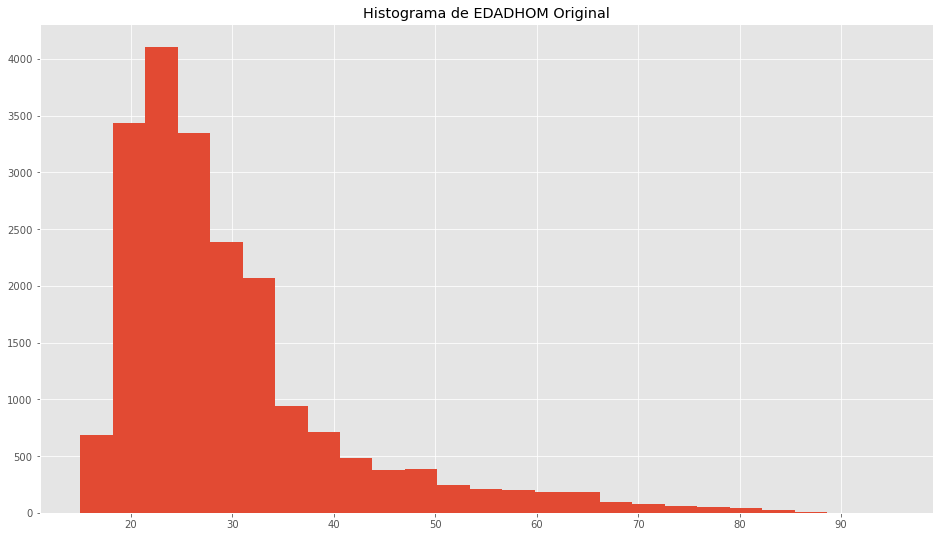

In [82]:
plt.hist(y_test, bins=25)
plt.title('Histograma de EDADHOM Original')

Text(0.5, 1.0, 'Histograma de EDADHOM predicho')

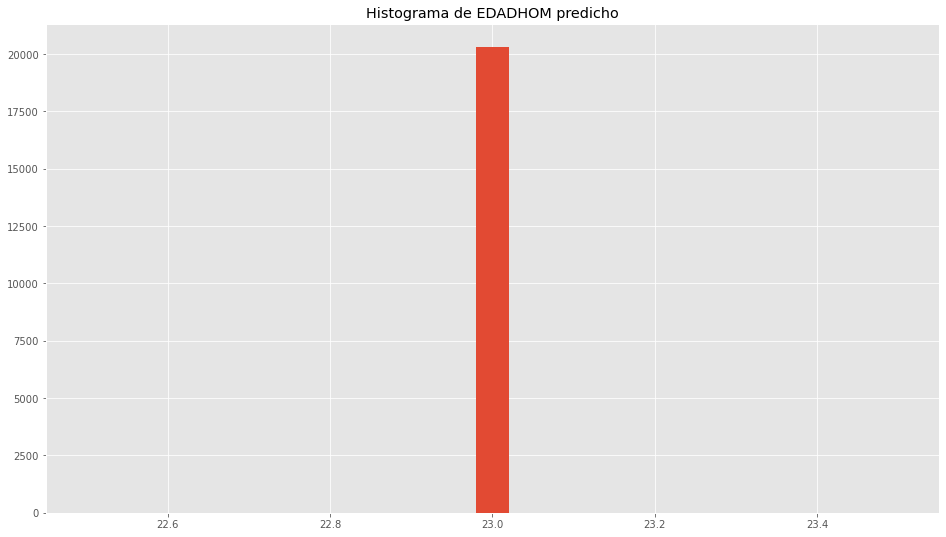

In [83]:
plt.hist(y_pred, bins=25)
plt.title('Histograma de EDADHOM predicho')